In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('../assets/diabetes.csv')

In [19]:
df=df.iloc[:,2:]

In [20]:
df.sample(5)

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,80,0,0,26.8,0.186,69,0
551,68,30,106,31.9,0.591,25,0
235,72,0,0,43.6,0.479,26,1
445,78,63,14,59.4,2.420,25,1
562,68,34,77,37.6,0.401,24,0


In [21]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1),
                                                    df['Outcome'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((537, 6), (231, 6))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
scaler.mean_

array([69.66666667, 21.03165736, 84.90130354, 32.25512104,  0.4713203 ,
       33.67039106])

In [24]:
X_train

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
580,90,46,0,42.1,0.371,21
418,68,0,0,18.2,0.624,27
764,70,27,0,36.8,0.340,27
363,78,0,0,38.5,0.520,67
757,72,0,0,36.3,0.258,52
...,...,...,...,...,...,...
763,76,48,180,32.9,0.171,63
192,66,0,0,30.4,0.383,36
629,65,22,0,24.7,0.148,21
559,74,0,0,30.1,0.300,35


In [25]:
X_train_scaled

array([[ 1.04559346,  1.55899991, -0.71652335,  1.22646853, -0.3002719 ,
        -1.05654479],
       [-0.08570438, -1.31319697, -0.71652335, -1.75097771,  0.45699051,
        -0.55622332],
       [ 0.01714088,  0.37265772, -0.71652335,  0.56619802, -0.39305899,
        -0.55622332],
       ...,
       [-0.23997227,  0.06046241, -0.71652335, -0.941212  , -0.96774035,
        -1.05654479],
       [ 0.22283139, -1.31319697, -0.71652335, -0.26848356, -0.51278428,
         0.11087198],
       [ 0.63421243, -1.31319697, -0.71652335, -4.01832171,  0.50488062,
         2.94602702]])

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
X_train_scaled

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.045593,1.559000,-0.716523,1.226469,-0.300272,-1.056545
1,-0.085704,-1.313197,-0.716523,-1.750978,0.456991,-0.556223
2,0.017141,0.372658,-0.716523,0.566198,-0.393059,-0.556223
3,0.428522,-1.313197,-0.716523,0.777983,0.145705,2.779253
4,0.119986,-1.313197,-0.716523,0.503908,-0.638496,1.528450
...,...,...,...,...,...,...
532,0.325677,1.683878,0.802584,0.080339,-0.898898,2.445706
533,-0.188550,-1.313197,-0.716523,-0.231110,-0.264354,0.194259
534,-0.239972,0.060462,-0.716523,-0.941212,-0.967740,-1.056545
535,0.222831,-1.313197,-0.716523,-0.268484,-0.512784,0.110872


In [28]:
np.round(X_train.describe(), 1)

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.0,537.0,537.0,537.0,537.0,537.0
mean,69.7,21.0,84.9,32.3,0.5,33.7
std,19.5,16.0,118.6,8.0,0.3,12.0
min,0.0,0.0,0.0,0.0,0.1,21.0
25%,64.0,0.0,0.0,27.5,0.2,24.0
50%,72.0,24.0,45.0,32.4,0.4,29.0
75%,80.0,33.0,135.0,36.8,0.6,41.0
max,122.0,99.0,846.0,67.1,2.4,81.0


In [29]:
np.round(X_train_scaled.describe(), 1)

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.0,537.0,537.0,537.0,537.0,537.0
mean,-0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.6,-1.3,-0.7,-4.0,-1.2,-1.1
25%,-0.3,-1.3,-0.7,-0.6,-0.7,-0.8
50%,0.1,0.2,-0.3,0.0,-0.3,-0.4
75%,0.5,0.7,0.4,0.6,0.4,0.6
max,2.7,4.9,6.4,4.3,5.8,3.9


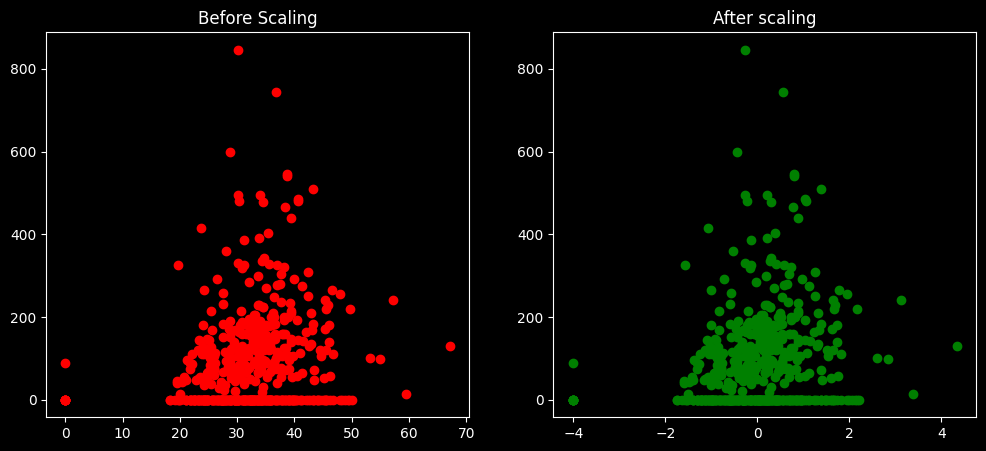

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['BMI'], X_train['Insulin'], color='red')
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['BMI'], X_train['Insulin'],color='green')
ax2.set_title("After scaling")
plt.show()